Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [ ]:
# a. {"strawberry", "strawberry", "blueberry", "cinnamon"}

# b. probability of getting strawberry P(A) = 2/4
  #  probability of NOT getting cinnamon P(B) = 3/4
  #  probability of A and B = 3/8

# c. No, A and B are NOT mutually exclusive.
  #  Reason: Two events are said to be mutually exclusive if they cannot occur at the same time or simultaneously. But  In this case,
  #  event A (drawing a strawberry-flavored jelly bean) and event B (not drawing a cinnamon-flavored jelly bean) can happen simultaneously.
  #  For example, if you draw a strawberry-flavored jelly bean, it satisfies both events A and B. So, they are not mutually exclusive.



 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
def P(event, sample_space, indivisual_prob):

    probability_of_event = sum(indivisual_prob[outcome] for outcome in event)
    return probability_of_event


sample_space = {"strawberry", "strawberry", "blueberry", "cinnamon"}

# Probabilities of each outcome
indivisual_prob = {
    "strawberry": 2/4,   # 2 strawberries out of 4 total
    "blueberry": 1/4,    # 1 blueberry out of 4 total
    "cinnamon": 1/4      # 1 cinnamon out of 4 total
}

# Event A: Strawberry(Given)
event_A = {"strawberry"}
probability_of_A = P(event_A, sample_space, indivisual_prob)
print("Probability of event A:", probability_of_A)

# Event B: Not getting cinnamon
event_B = {"strawberry", "blueberry"}
probability_of_B = P(event_B, sample_space, indivisual_prob)
print("Probability of event B:", probability_of_B)


Probability of event A: 0.5
Probability of event B: 0.75


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

In [ ]:
# Setting up the dependencies: (DO NOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

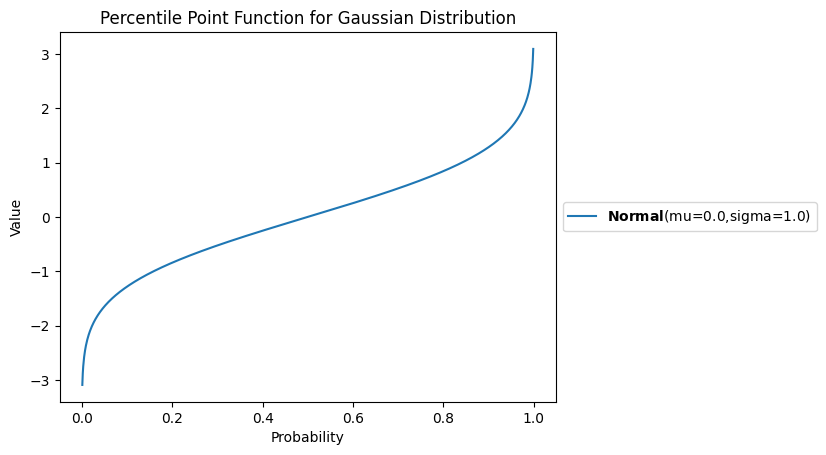

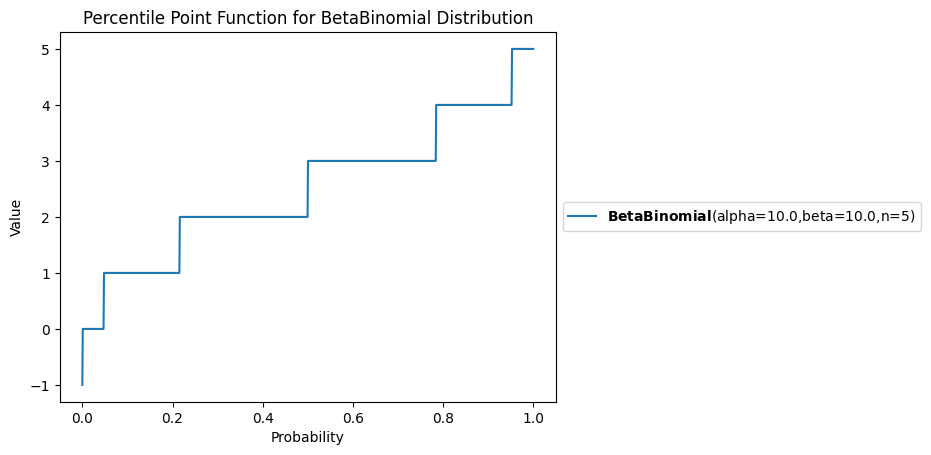

'The PPF and CDF are inverses of each other. If you know the probability, you can use the PPF to find the corresponding value. If you know the value, you can use the CDF to find the corresponding probability. The PMF/PDF, on the other hand, gives the density/probability at a specific point, providing a different perspective on the distribution.'

In [ ]:
import preliz as pz
import matplotlib.pyplot as plt

# Plot PPF for Gaussian distribution
gauss_dist = pz.Normal(0, 1)
gauss_dist.plot_ppf()
plt.title("Percentile Point Function for Gaussian Distribution")
plt.xlabel("Probability")
plt.ylabel("Value")
plt.show()

# Plot PPF for BetaBinomial distribution
betabinomial_dist = pz.BetaBinomial(alpha=10, beta=10, n=5)
betabinomial_dist.plot_ppf()
plt.title("Percentile Point Function for BetaBinomial Distribution")
plt.xlabel("Probability")
plt.ylabel("Value")
plt.show()

"""The PPF and CDF are inverses of each other. If you know the probability, you can use the PPF to find the corresponding value. If you know the value, you can use the CDF to find the corresponding probability. The PMF/PDF, on the other hand, gives the density/probability at a specific point, providing a different perspective on the distribution."""


Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

In [ ]:
# If the function is a probability distribution, then the first moment is the expected value, the second central moment is the variance,
# the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis.

In [ ]:
import preliz as pz
import numpy as np

# Defining different combinations of parameters for the SkewNormal distribution
parameters = [
    {"mu": 0, "sigma": 1, "alpha": -2},  # Parameters for SkewNormal distribution
    {"mu": 2, "sigma": 1.5, "alpha": 1},  # Parameters for SkewNormal distribution
    {"mu": -1, "sigma": 0.5, "alpha": 0.5}  # Parameters for SkewNormal distribution
]

# Compute moments (mean and variance) for each parameter combination
for i, params in enumerate(parameters):
    mu = params["mu"]
    sigma = params["sigma"]
    alpha = params["alpha"]
    mean = mu + sigma * alpha / np.sqrt(1 + alpha**2) * np.sqrt(2 / np.pi)
    variance = sigma**2 * (1 - (2 * alpha**2) / (1 + alpha**2) * (2 / np.pi))
    print(f"Parameter combination {i+1}: Mean = {mean}, Variance = {variance}")

# Generate random samples of different sizes and checking if we can recover the moments
sample_sizes = [10, 100, 1000]
for params in parameters:
    mu = params["mu"]
    sigma = params["sigma"]
    alpha = params["alpha"]
    skew_normal_dist = pz.SkewNormal(mu, sigma, alpha)
    for size in sample_sizes:
        samples = skew_normal_dist.rvs(size)
        sample_mean = np.mean(samples)
        sample_variance = np.var(samples, ddof=1)  # Use ddof=1 for unbiased estimation of variance
        print(f"Sample size = {size}: Sample Mean = {sample_mean}, Sample Variance = {sample_variance}")


Parameter combination 1: Mean = -0.7136496464611085, Variance = -0.018591635788130167
Parameter combination 2: Mean = 2.8462843753216345, Variance = 0.8176055121729419
Parameter combination 3: Mean = -0.8215875883847229, Variance = 0.18633802276324185
Sample size = 10: Sample Mean = -0.5071047241627089, Sample Variance = 0.16773320442419398
Sample size = 100: Sample Mean = -0.6305578142235296, Sample Variance = 0.45962768930803355
Sample size = 1000: Sample Mean = -0.7078772131684857, Sample Variance = 0.4885380670957052
Sample size = 10: Sample Mean = 3.248360105461147, Sample Variance = 1.4905531574631865
Sample size = 100: Sample Mean = 2.9255287976578637, Sample Variance = 1.3904553962672932
Sample size = 1000: Sample Mean = 2.79620290985285, Sample Variance = 1.5240050846104385
Sample size = 10: Sample Mean = -0.5712938578933489, Sample Variance = 0.0512785308406753
Sample size = 100: Sample Mean = -0.8529682229525989, Sample Variance = 0.2160917562467494
Sample size = 1000: Sampl